# Part I - Introduction to Qiskit Runtime


You can find a copy of this presentation at

https://github.com/Qiskit-Partners/qiskit-runtime/tree/main/extras/qce21_runtime_tutorial.ipynb

To sign up for an IBM Quantum account: 

https://quantum-computing.ibm.com

## Introduction to Qiskit

Qiskit is a Python-based, open source software development toolkit (SDK) for working with quantum computers.  It can be used at the level of circuits, algorithms, and application modules.


### Installing Qiskit

*Command:* `pip install Qiskit`

*Python version:* 3.6+


### Typical Qiskit Workflow

**Build**: Design a quantum circuit(s) that represents the problem you are considering.

**Compile**: Compile circuits for a specific quantum backend, e.g., a quantum system or classical simulator.

**Run**: Run the compiled circuits on the specified quantum backend.

**Analyze**: Compute summary statistics and visualize the results of the experiments.


#### Step 1: Build the Circuit

In [1]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Measure qubits 0 and 1 onto classical bits 0 and 1
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

#### Step 2: Compile the Circuit

In [2]:
from qiskit import transpile
from qiskit.providers.aer import AerSimulator

# Use a local simulator
simulator = AerSimulator()

# Compile the circuit down to low-level instructions supported by the backend
compiled_circuit = transpile(circuit, simulator)


#### Step 3: Run the Circuit

In [3]:
# Execute the circuit on the qasm simulator
# shots defines the number of executions
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()


#### Step 4: Analyze and Visualize the Result

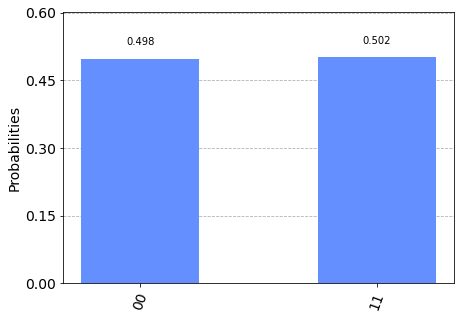

In [4]:
from qiskit.visualization import plot_histogram

# Get summarized counts of qubit measurements
counts = result.get_counts()

# Plot a histogram
# "00" means both qubits were measured 0; "11" means both were measured 1.
plot_histogram(counts)

## Introduction to IBM Quantum

Offers access to cloud-based quantum computing services

- quantum processors
- simulators
- experiments
- tutorials
- **runtime**

### Using Qiskit to access IBM Quantum services

Qiskit is designed to work with different providers. A _provider_ is any entity that provides quantum-related services that can be accessed using Qiskit. The most common service is quantum processors and simulators. `AQT`, `Honeywell`, and `IBM` are example of companies that provide such access through Qiskit.

Since `Runtime` is currently an IBM-only service, this tutorial will focus on using IBM Quantum services.


Before you can access IBM Quantum services, you need an IBM Quantum account. 
You can sign up for an account at https://quantum-computing.ibm.com/.

Once you have an account, you can grab your API token

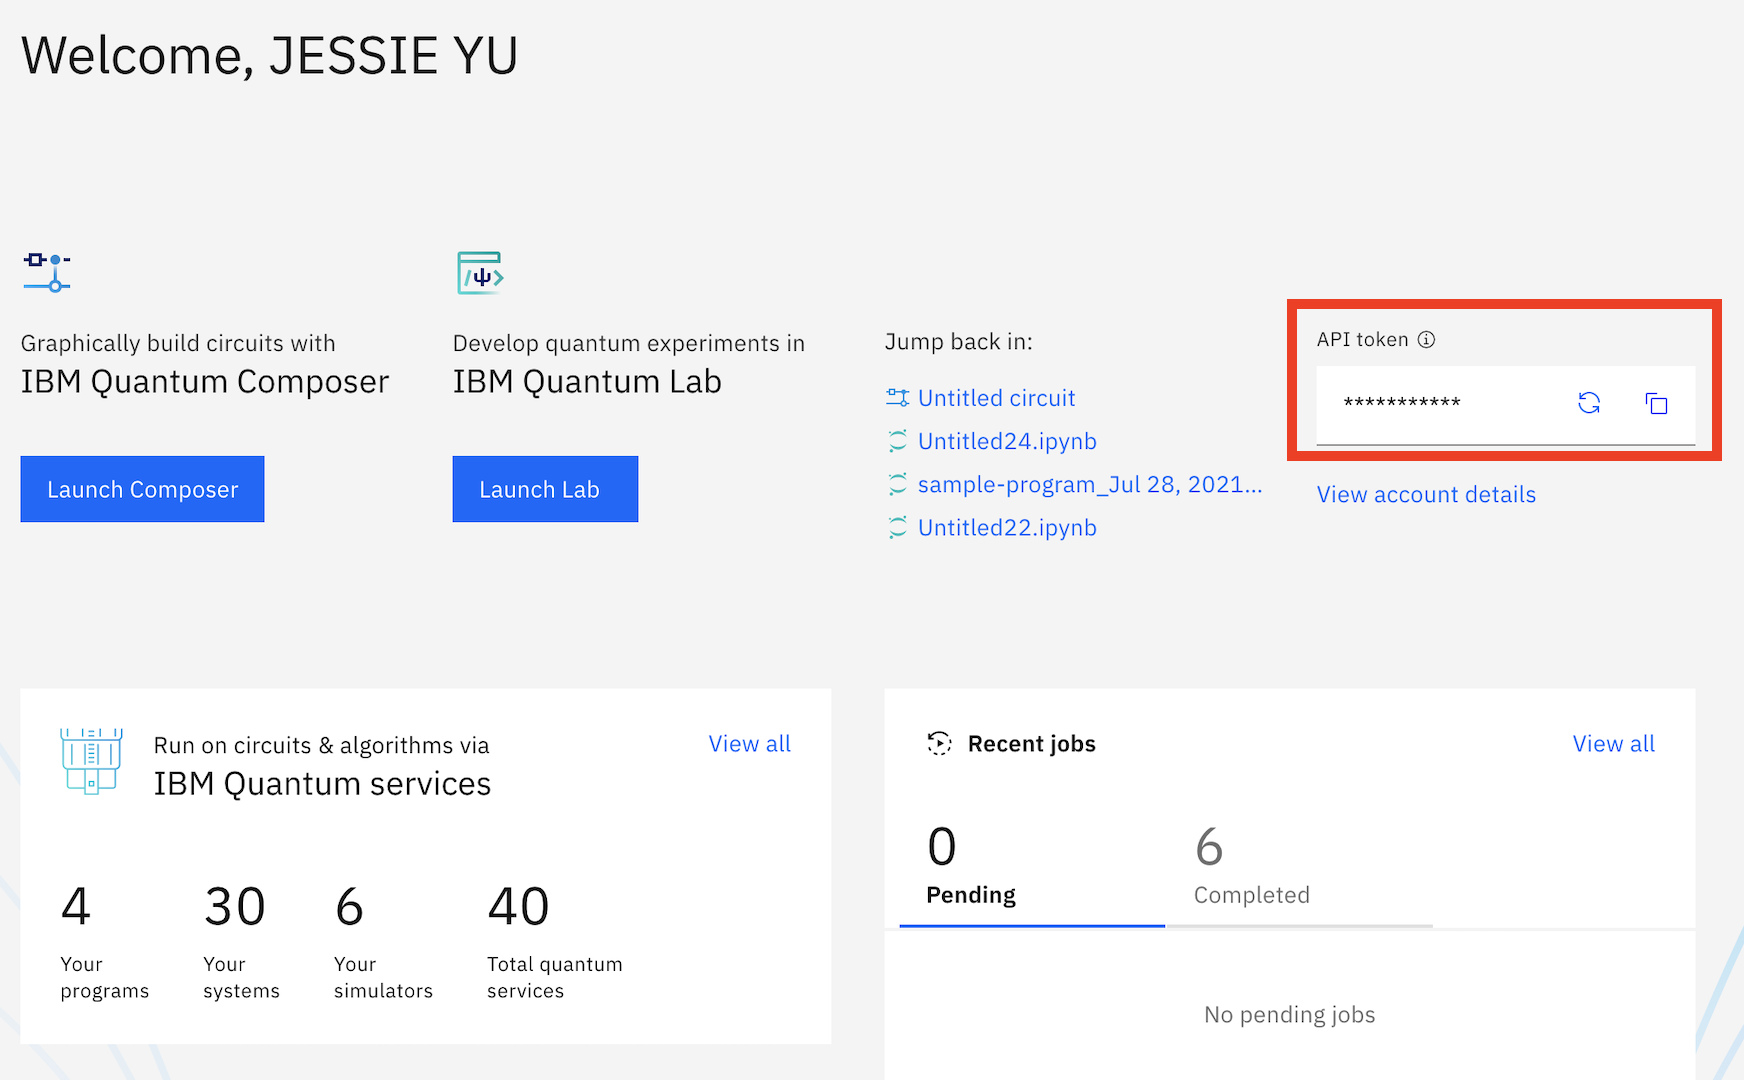

#### Initializing Your Account in Qiskit

In [5]:
# Import the module needed to access IBM Quantum
from qiskit import IBMQ

# Load your IBM Quantum account or enable the account if it's not previously saved.
provider   = IBMQ.load_account()
# provider = IBMQ.enable_account(MY_TOKEN)

IBM Quantum provider uses the pattern:

```
provider.SERVICE.METHOD()
```

where SERVICE might be one of {backend, runtime, etc}

- Use `provider.backend` to target a quantum processor or simulator for running circuits
- Use `provider.runtime` to target a higher level runtime program

 

#### Running a Circuit on IBM Quantum Backend

In [6]:
# Select a backend to run the circuit
backend = provider.backend.ibmq_qasm_simulator

# Compile the circuit for this backend
compiled_circuit = transpile(circuit, backend)

# Run the circuit on the backend
job = backend.run(compiled_circuit)

# Get the result
result = job.result()

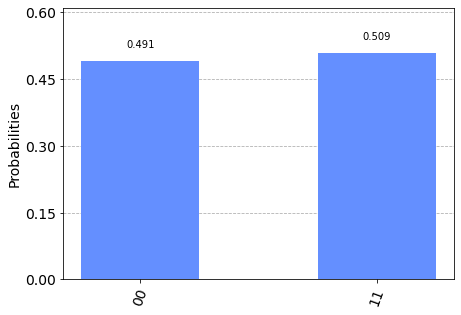

In [7]:
# Plot the result
# "00" means both qubits were measured 0; "11" means both were measured 1.
plot_histogram(result.get_counts())


## Variational Quantum Algorithms

Variational Quantum Algorithms (VQA) use a classical optimizer to train a parameterized quantum circuit to approximate solutions for a given problem. 

VQA's typically need fewer gates and qubits. In turn, they are more resistant to noise.

Therefore, they are well suited to handle near-term quantum computer constraints.

VQA's are typically iterative. Each iteration involves both quantum and classical processing. 

Output (a measurement) from one iteration is sent to the classical optimizer which generates input (a parameter) for the next iteration:

<div>
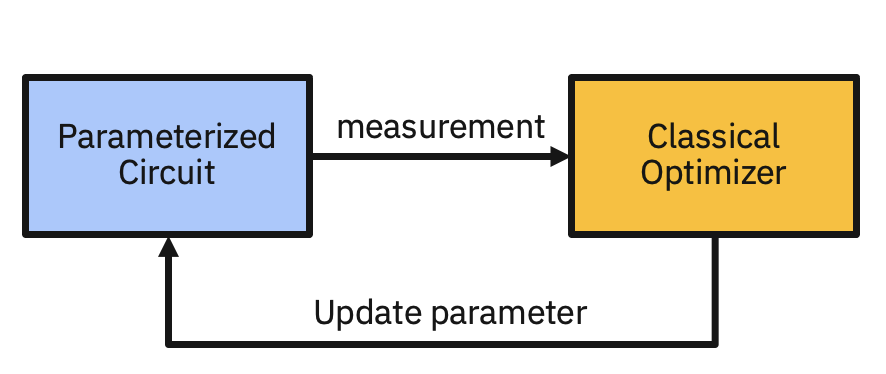
</div>

## Running a VQA Prior to the Qiskit Runtime

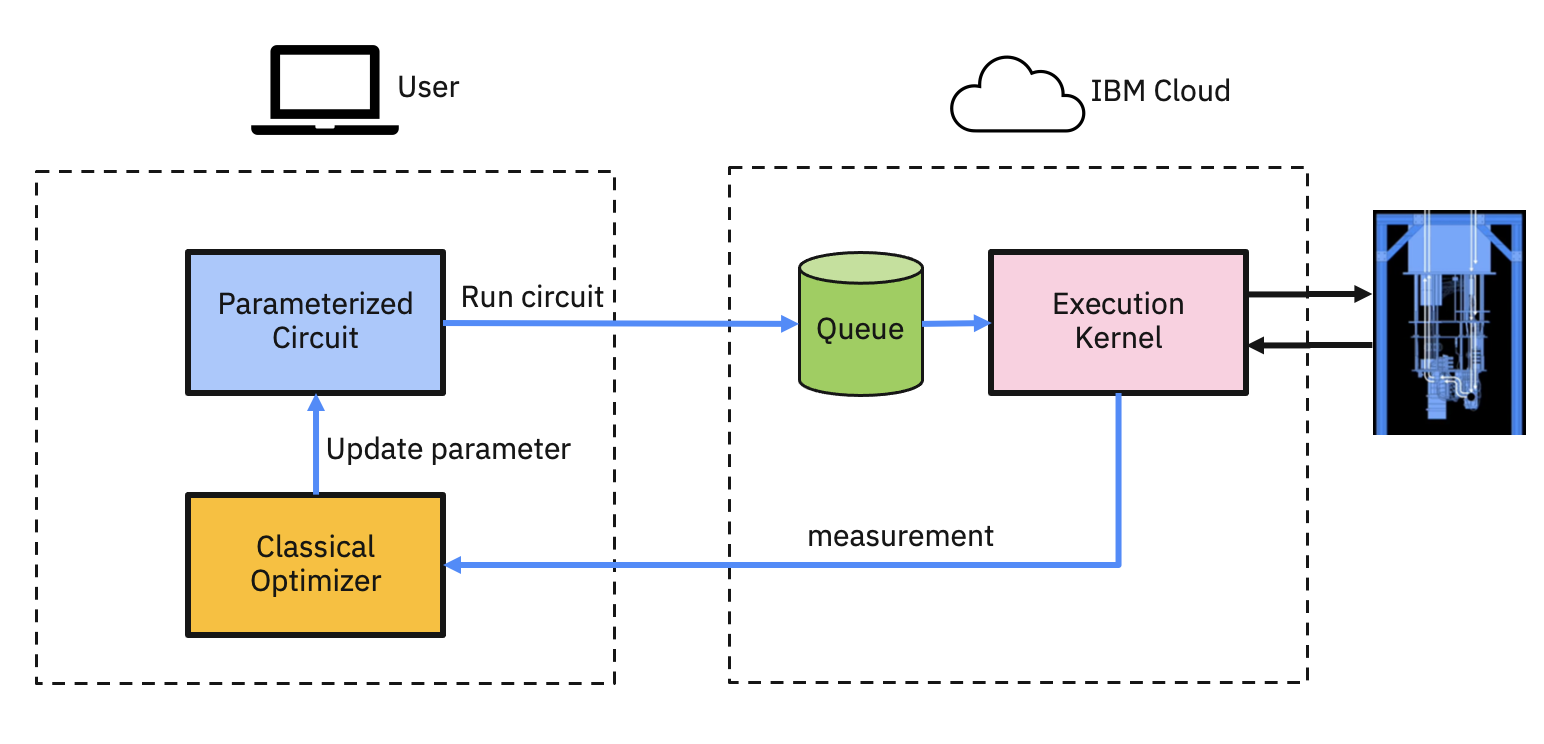

## Qiskit Runtime

Qiskit Runtime is a new execution model. 

It reduces I/O overhead for applications, such as VQA's, that need many iterations that use both quantum and classical processing. 



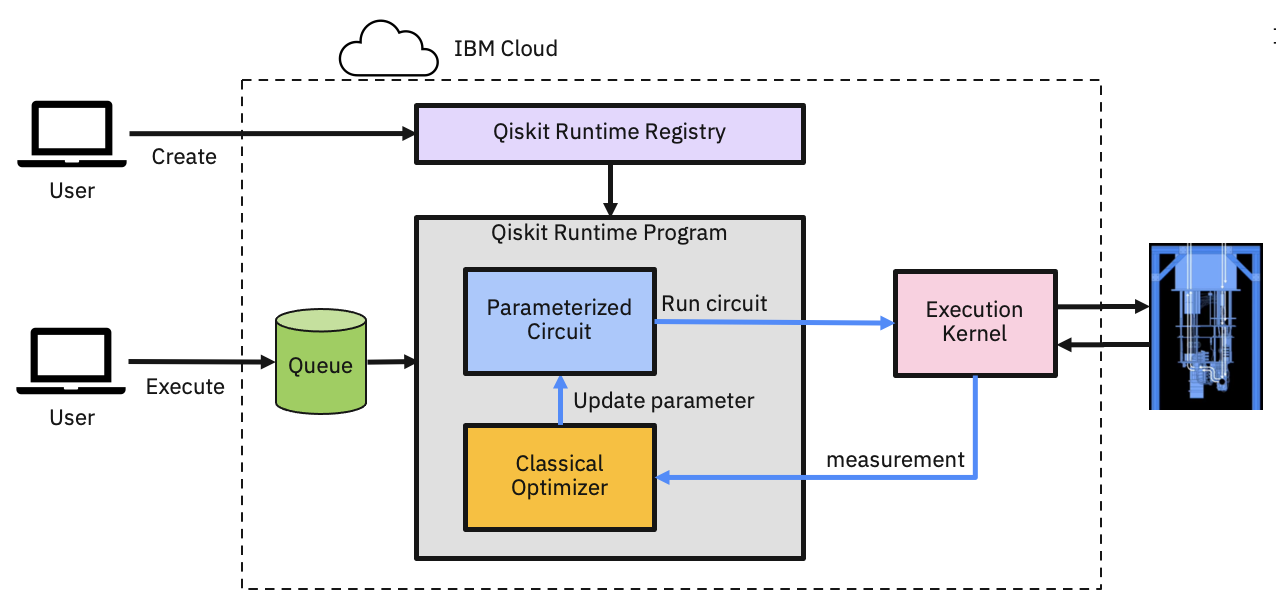

### Qiskit Runtime Benefits

This year, the Qiskit Runtime contributed to a **120x** speedup in simulating lithium hydride when compared to a previous simulation from in 2017.

Beyond performance, you can also create larger applications using smaller, pre-built programs.

Qiskit Runtime programs can be commercialized or shared freely in the cloud.

### Defining a Qiskit Runtime Program


**source**: Python code that uses Qiskit to do quantum/classical processing

**metadata**: Documentation that describes what the program does

#### Example: hello-world

In [8]:
import random

from qiskit import transpile
from qiskit.circuit.random import random_circuit

def prepare_circuits(backend):
    """Generate a random circuit."""
    circuit = random_circuit(num_qubits=5, depth=4, measure=True,
                             seed=random.randint(0, 1000))
    return transpile(circuit, backend)


def main(backend, user_messenger, iterations):
    """Main entry point of the program."""
    for it in range(iterations):
        qc = prepare_circuits(backend)
        result = backend.run(qc).result()
        user_messenger.publish({"iteration": it, "counts": result.get_counts()})

    return "All done!"

#### hello-world Metadata

```
{
  "name": "hello-world",
  "description": "A sample runtime program.",
  "max_execution_time": 300,
  "version": "1.0",
  "backend_requirements": {"min_num_qubits":  5},
  "parameters": [
    {"name": "iterations", "description": "Number of iterations to run. Each iteration generates and runs a random circuit.", "type": "int", "required": True}
  ],
  "return_values": [
    {"name": "-", "description": "A string that says 'All done!'.", "type": "string"}
  ],
  "interim_results": [
    {"name": "iteration", "description": "Iteration number.", "type": "int"},
    {"name": "counts", "description": "Histogram data of the circuit result.", "type": "dict"}
  ]
}
```

## Finding and Running Programs

Since programs are now stored in the cloud, you can browse and run previously published programs.

Using Qiskit (0.29+), you can search by program ID or browse the entire catalog. 

You can also list available programs on the IBM Quantum website. 

### Finding by Program ID

In [9]:
# Print the metadata of a runtime program
print(provider.runtime.program("hello-world"))

hello-world:
  Name: hello-world
  Description: A sample runtime program.
  Version: 1.0
  Creation date: 2021-07-02T13:45:13.000000
  Max execution time: 300
  Input parameters:
    - iterations:
      Description: Number of iterations to run. Each iteration generates and runs a random circuit.
      Type: int
      Required: True
  Interim results:
    - iteration:
      Description: Iteration number.
      Type: int
    - counts:
      Description: Histogram data of the circuit result.
      Type: dict
  Returns:
    - -:
      Description: A string that says 'All done!'.
      Type: string


### Listing All Programs

In [10]:
provider.runtime.pprint_programs(refresh=True)

estimator:
  Name: estimator
  Description: Expectation value estimator. A runtime program that estimates the value of an observable for an input quantum circuit. This program is in beta mode and is only available to select accounts.
  Version: 0.1
  Creation date: 2021-10-18T12:35:23.000000
  Max execution time: 18000
  Input parameters:
    - circuit:
      Description: A parameterized or non-parameterized quantum circuit.
      Type: QuantumCircuit
      Required: True
    - observable:
      Description: The Hamiltonian to be evaluated.
      Type: list[tuple[str, float]]
      Required: True
    - parameters:
      Description: The parameters to be bound.
      Type: Union[list[float], list[list[float]]]
      Required: False
    - class_name:
      Description: The name of the evaluator class.
      Type: str
      Required: False
    - transpile_options:
      Description: Options for transpile.
      Type: dict
      Required: False
    - run_options:
      Description: Options

### Using the IBM Quantum Website

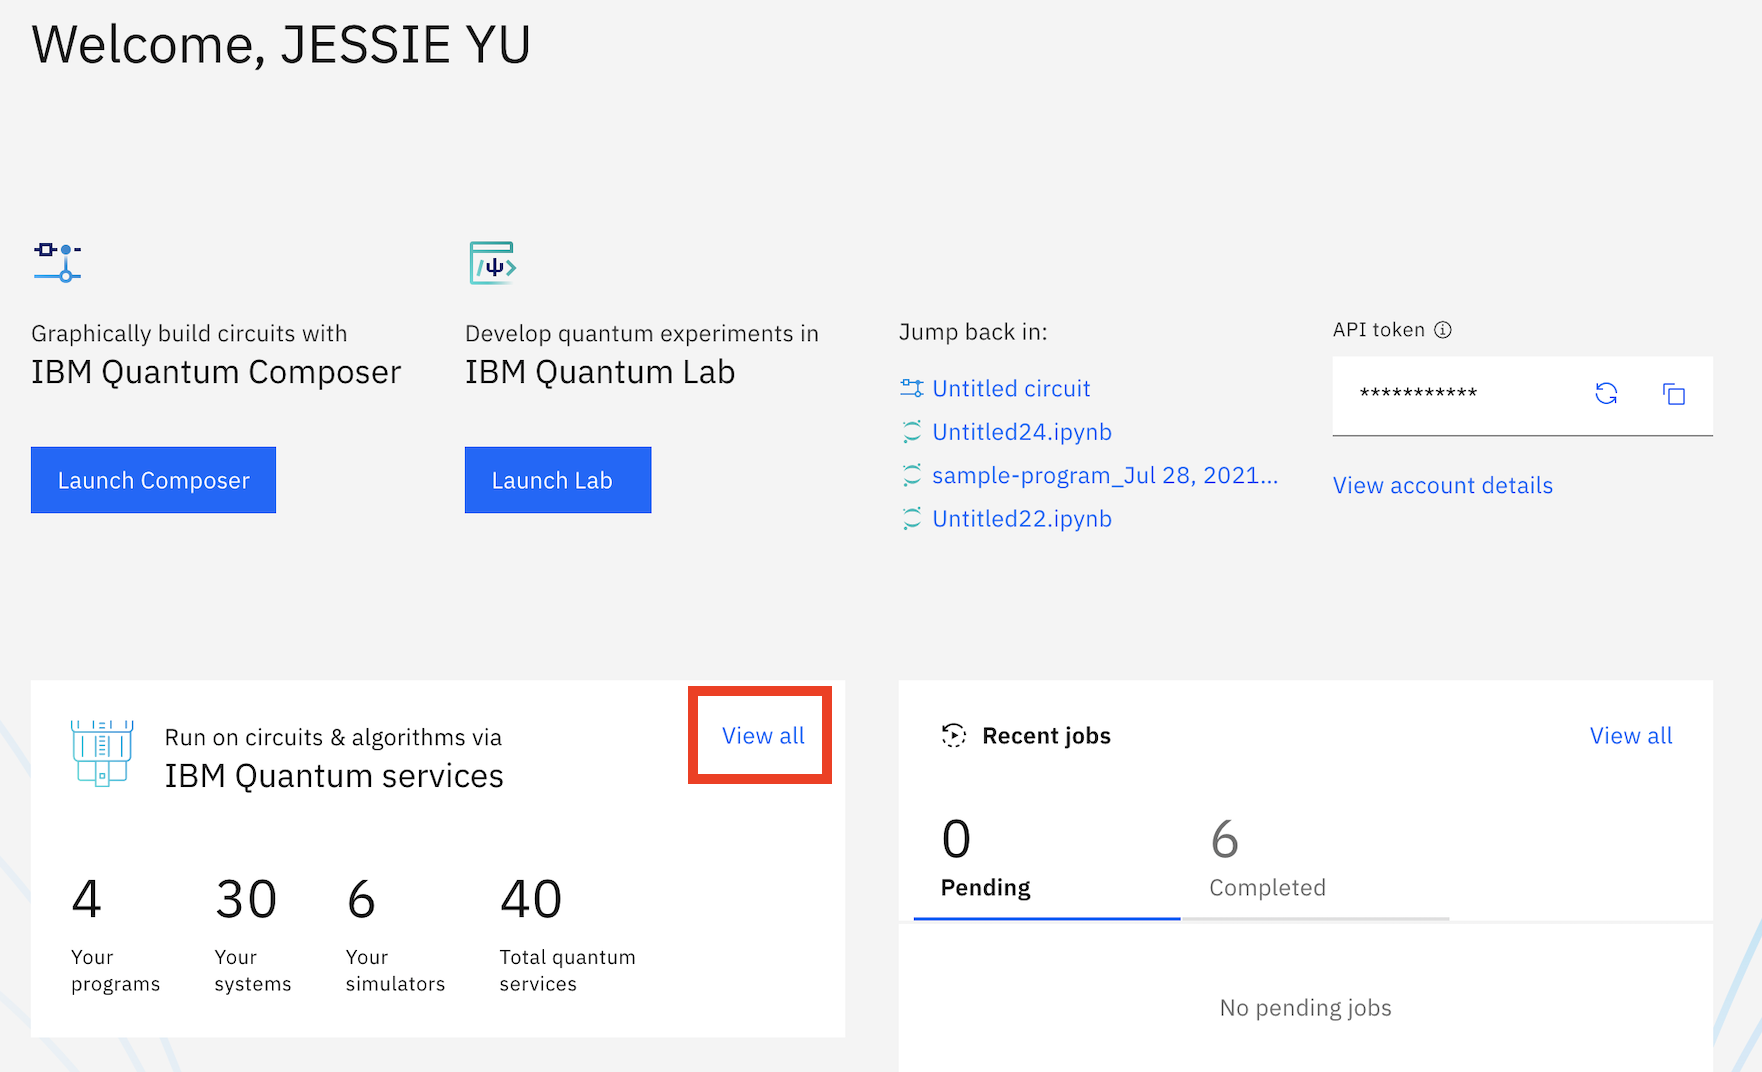

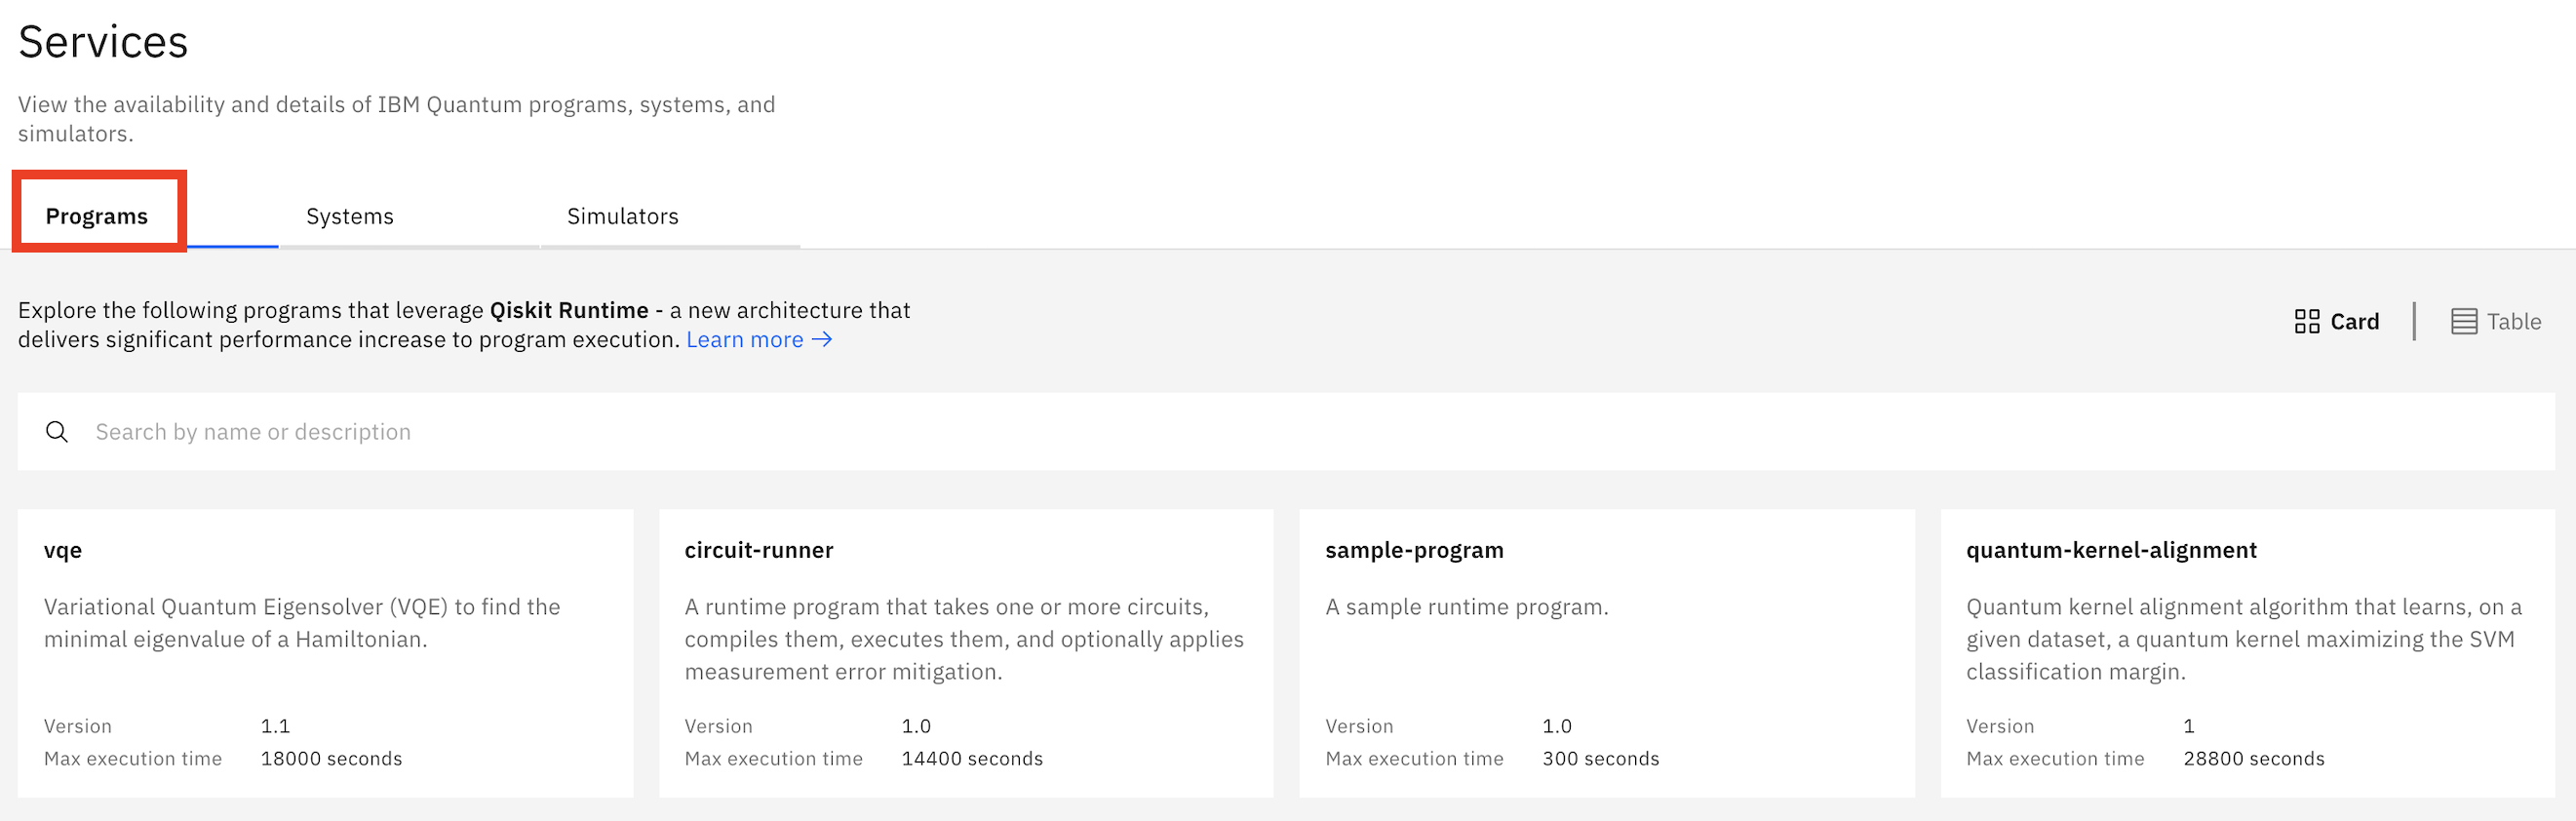

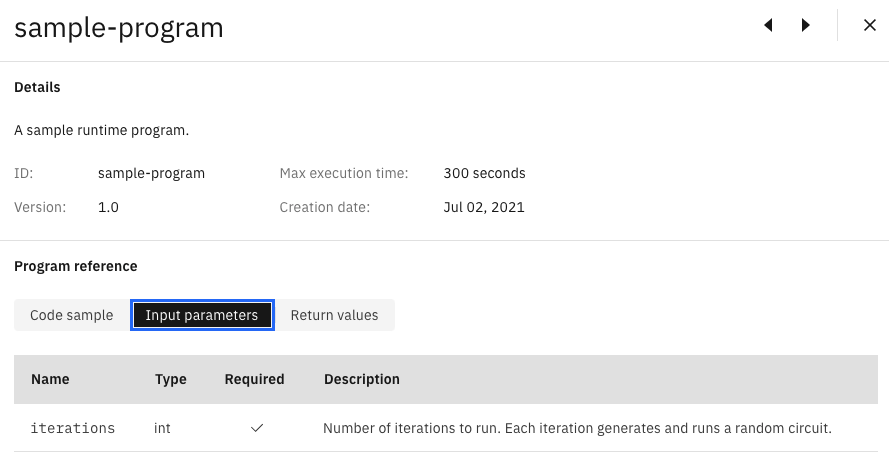

### Running a Program 

Step 1 of 2: defining inputs, options, and callback

In [11]:
# Define program inputs in a dictionary
runtime_inputs = {
    'iterations': 2
}

In [12]:
# Alternatively, define program inputs in a namespace
params = provider.runtime.program("hello-world").parameters()
params.iterations = 2

In [13]:
# Define program options (more on backend selection later...)
options = {'backend_name': 'ibmq_qasm_simulator'}

In [14]:
# Define interim result callback (optional)
def interim_result_callback(job_id, interim_result):
    print(f"interim result: {interim_result}")

### Running a Program 

Step 2 of 2: executing and getting results

In [15]:
# Run program
job = provider.runtime.run(program_id="hello-world",
                           options=options,
                           inputs=runtime_inputs,
                           callback=interim_result_callback
                          )
print(job.job_id())

c5mulq847gu23p3uathg


In [16]:
# Get job result
result = job.result()
print(result)

interim result: {'iteration': 0, 'counts': {'11111': 9, '11000': 25, '11101': 44, '01011': 27, '11001': 33, '01001': 169, '01100': 192, '11010': 10, '01101': 195, '01111': 39, '01010': 39, '01000': 138, '11011': 7, '11110': 14, '11100': 42, '01110': 41}}
interim result: {'iteration': 1, 'counts': {'01010': 4, '00111': 3, '00010': 612, '01111': 405}}
All done!


### Backend Selection

At this time, Qiskit Runtime is only available on `ibmq_qasm_simulator` for open-access users. If you have more than one hub/group/project in your account, you can execute runtime programs on any systems to which you have access.

`backend_requirements` of a program gives you a hint on which backend to pick:

In [17]:
program = provider.runtime.program("hello-world")

print(f"Backend requirements for the program: {program.backend_requirements}")

backends = provider.backends(**program.backend_requirements)
print(f"Backends that match the requirement:")
for back in backends:
    print(back.name())

Backend requirements for the program: {'min_num_qubits': 5}
Backends that match the requirement:
ibmq_qasm_simulator
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


## Job Interaction


When you run a published program, the execution instance becomes a job. 

Using Qiskit, you can reference and interact with your job.

You can also list and interact with your jobs on the IBM Quantum website. 


Note that a **runtime job** is an instance of `qiskit.providers.ibmq.runtime.RuntimeJob`. It is not the same as a traditional circuit job and therefore has different methods/attributes.


Runtime job restrictions:

- Cannot exceed max execution time
- Consumes "fair share"
- 35GB of memory per execution

### Referencing Jobs

In [18]:
retrieved_job = provider.runtime.job(job.job_id())
print(f"Job {retrieved_job.job_id()} is an execution instance of runtime program {retrieved_job.program_id}.")
print(f"This job ran on backend {retrieved_job.backend()} and had input parameters {retrieved_job.inputs}")

Job c5mulq847gu23p3uathg is an execution instance of runtime program hello-world.
This job ran on backend ibmq_qasm_simulator and had input parameters {'iterations': 2}


In [19]:
retrieved_jobs = provider.runtime.jobs(limit=2)
for rjob in retrieved_jobs:
    print(rjob.job_id())

c5mulq847gu23p3uathg
c5mts3847gu23p3uaojg


### Summary of job operations

- `job_id()`, `backend()`, `inputs`, `program_id`, `creation_date`: metadata of job execution
- `result()`, `error_messages()`, `logs()`, `status()`: returns job execution output and status
- `stream_results`, `cancel_result_streaming()`: (re)enables and disable streaming interim results
- `cancel()`: cancels the job

Or you can use the IBM Quantum website:

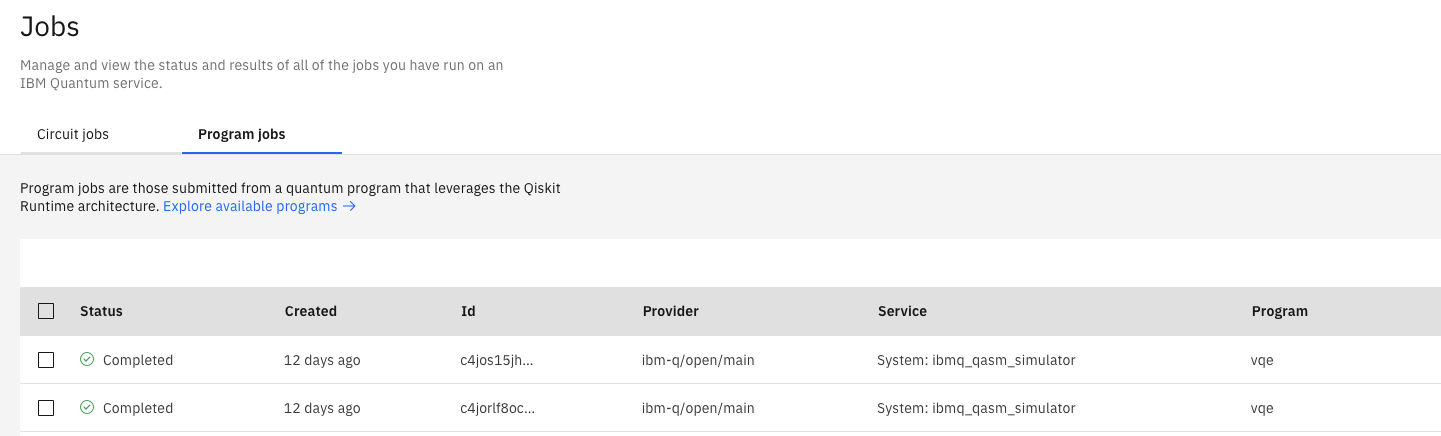

## Writing, Uploading, and Testing a Qiskit Runtime Program

Like the example we saw earlier, we will now write a new program and upload it to the cloud. 

We will write the metadata and source code. We will then test it after upload and show the optional step of making the program publicly available.
<br>


**Note**: You can upload a runtime program only if you have more than 1 hub/group/project in your account.

### Defining Program Metadata

In [20]:
metadata = {
  "name": "ieee-runtime-tutorial",
  "description": "Exploring the equator of a Bloch sphere using input RZ angles and returning the x measurements.",
  "max_execution_time": 300,
  "version": "1.0",
  "parameters": [
    {"name": "angles", "description": "A list of angles to rotate around the z axis.", "type": "numpy array or list", "required": True}
  ],
  "return_values": [
    {"name": "-", "description": "Combined measurements.", "type": "list"}
  ],
  "interim_results": [
    {"name": "angle", "description": "Angle used for the rotation.", "type": "float"},
    {"name": "counts", "description": "Histogram data of the circuit result.", "type": "dict"}
  ]
}


### Writing Source Code

Step 1: Prepare the circuit

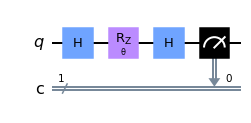

In [21]:
from qiskit.circuit import QuantumCircuit, Parameter

def prepare_circuit():
    theta = Parameter('θ')
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.rz(theta, 0)
    qc.h(0)
    qc.measure(0, 0)
    return qc

    
circ = prepare_circuit()
circ.draw('mpl')

### Writing Source Code

Step 2: Write the main function

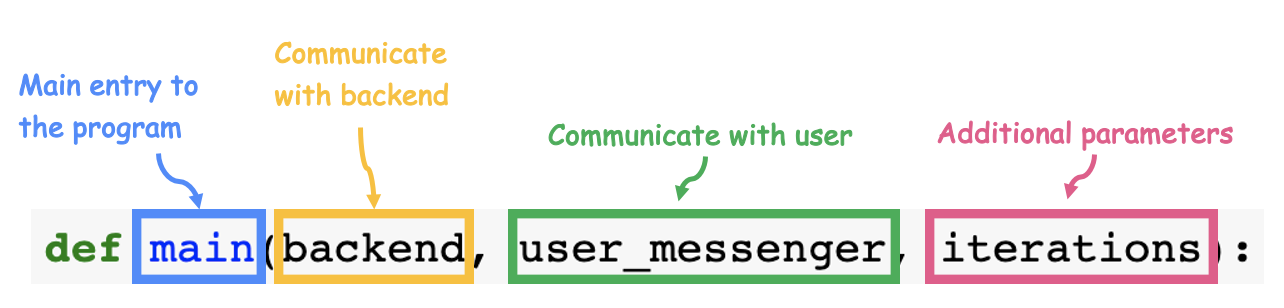

In [22]:
from qiskit import transpile

def main(backend, user_messenger, angles):
    all_counts = []
    
    # Get the parameterized circuit
    circ = prepare_circuit()
    
    # Get the parameter variable
    param = circ.parameters[0]

    # For each input angle
    for theta_val in angles:
        # Set the parameter value
        bound_circ = circ.bind_parameters({param: theta_val})
        # Run the circuit
        job = backend.run(transpile(bound_circ, backend=backend))
        # Get counts
        counts = job.result().get_counts()
        # Publish interim result
        user_messenger.publish({"angle": theta_val, "counts": counts})
        # Aggregate counts
        all_counts.append(counts)
    
    # Return combined measurements
    return all_counts

Note that the `backend` here is an instance of `qiskit.providers.ibmq.runtime.ProgramBackend`, **not** an `IBMQBackend` and does not have the same methods. You cannot, for example, use this backend to retrieve previously executed jobs.

### Local testing 

You can test whether the routine works by simply calling the `main()` function with a backend instance, a `UserMessenger`, and sample arguments.

In [23]:
from qiskit.providers.ibmq.runtime import UserMessenger
user_messenger = UserMessenger()

In [24]:
# Use the local Aer simulator
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

In [25]:
import numpy as np

# Execute the main routine with a simple input
theta_range = np.linspace(0, 2 * np.pi, 2)
main(backend, user_messenger, angles=theta_range)

{"angle": 0.0, "counts": {"0": 1024}}
{"angle": 6.283185307179586, "counts": {"0": 1024}}


[{'0': 1024}, {'0': 1024}]

### Uploading Your Program

In [26]:
runtime_program = """
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit import transpile

def prepare_circuits():
    theta = Parameter('θ')
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.rz(theta, 0)
    qc.h(0)
    qc.measure(0, 0)
    return qc

def main(backend, user_messenger, angles):
    circ = prepare_circuits()
    param = circ.parameters[0]
    all_counts = []
    for theta_val in angles:
        bound_circ = circ.bind_parameters({param: theta_val})
        job = backend.run(transpile(bound_circ, backend=backend))
        counts = job.result().get_counts()
        user_messenger.publish({"angle": theta_val, "counts": counts})
        all_counts.append(counts)
    return all_counts    
"""

In [27]:
program_id = provider.runtime.upload_program(
    data=runtime_program.encode(),
    metadata=metadata
)
print(program_id)

ieee-runtime-tutorial


At this time all program names must be unique amongst all users. So if you are following along, use a name that's not `ieee-runtime-tutorial`. 

The `upload_program()` method returns a **program ID** that uniquely identifies the program. This program ID is derived from the program name but may not be identical to the program name. The program ID is the input to a lot of methods, and program name is the more human friendly version.

In [28]:
# Alternatively, you can choose files

# program_id = provider.runtime.upload_program(
#     data="ieee_workshop.py"
#     metadata="ieee_workshop.json"
# )

In [29]:
# Let's make sure the program was uploaded properly.

print(provider.runtime.program(program_id))

ieee-runtime-tutorial:
  Name: ieee-runtime-tutorial
  Description: Exploring the equator of a Bloch sphere using input RZ angles and returning the x measurements.
  Version: 1.0
  Creation date: 2021-10-18T21:46:02.000000
  Max execution time: 300
  Input parameters:
    - angles:
      Description: A list of angles to rotate around the z axis.
      Type: numpy array or list
      Required: True
  Interim results:
    - angle:
      Description: Angle used for the rotation.
      Type: float
    - counts:
      Description: Histogram data of the circuit result.
      Type: dict
  Returns:
    - -:
      Description: Combined measurements.
      Type: list


### Testing Uploaded Program Using Qiskit

Once uploaded, you can test your program using Qiskit or the IBM Quantum website. 

We will focus on cloud testing using Qiskit here.

In [31]:
import numpy as np

# Define program inputs
theta_range = np.linspace(0, 2 * np.pi, 12)
runtime_inputs = {"angles": theta_range}

# Define options
options = {'backend_name': 'ibmq_qasm_simulator'}

# Run program
job = provider.runtime.run(program_id="ieee-runtime-tutorial",
                           options=options,
                           inputs=runtime_inputs
                          )
print(job.job_id())
final_result = job.result()
print(f"final result: {final_result}")

c5mumld7js99mk9mi700
final result: [{'0': 1024}, {'1': 71, '0': 953}, {'0': 709, '1': 315}, {'0': 432, '1': 592}, {'0': 169, '1': 855}, {'0': 27, '1': 997}, {'0': 19, '1': 1005}, {'0': 171, '1': 853}, {'1': 566, '0': 458}, {'1': 292, '0': 732}, {'1': 73, '0': 951}, {'0': 1024}]


### Processing the returned results

Sometime you may want to apply extra processing to the output of a program before returning it to the user. For example, to convert it to a different class that has additional convenience functions.

You can achieve this with a custom result decoder.

In [32]:
import matplotlib.pyplot as plt

from qiskit.providers.ibmq.runtime import ResultDecoder


class EquatorResult(ResultDecoder):
    
    def __init__(self, data):
        self._data = data
    
    @classmethod
    def decode(cls, data):
        data = super().decode(data)  # This is required to preformat the data returned.
        return cls(data)
    
    def draw(self):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)

        ax.plot(theta_range, list(map(lambda c: c.get('0', 0), self._data)), '.-', label='0')
        ax.plot(theta_range, list(map(lambda c: c.get('1', 0), self._data)), '.-', label='1')

        ax.set_xticks([i * np.pi / 2 for i in range(5)])
        ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
        ax.set_xlabel('θ', fontsize=14)
        ax.set_ylabel('Counts', fontsize=14)
        ax.legend(fontsize=14)
    

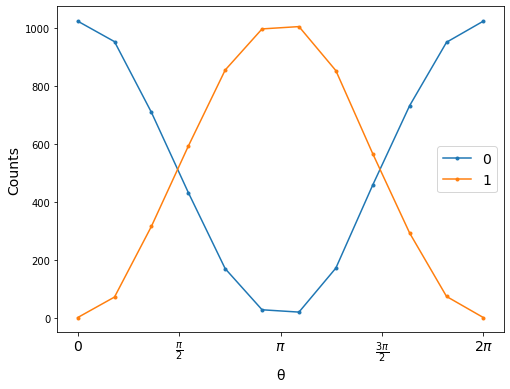

In [33]:
result = job.result(decoder=EquatorResult)
result.draw()

### Making the Program Public (Optional)

In [34]:
# Make the program public now that we know it's working
# provider.runtime.set_program_visibility(program_id=program_id, public=True)

### Deleting the Program (Optional)

In [35]:
# Delete the program
provider.runtime.delete_program("ieee-runtime-tutorial")

### Serializing program input

Runtime programs live in the cloud, and JSON is the standard way of passing data to and from cloud services. Therefore, when a user invokes a runtime program, the input parameters must first be serialized into the JSON format and then deserialized once received by the server. 

By default, this serialization and deserialization is done automatically using the `RuntimeEncoder` and `RuntimeDecoder` classes. In addition to standard JSON types (such as `int`, `float`, `list`, `dict`, etc), these classes also support

- complex number
- Python `datetime` object
- `numpy` array
- `scipy` sparse matrix
- Qiskit `QuantumCircuit` class
- Qiskit `ParameterExpression` class
- Qiskit `Result` class
- Qiskit operators classes


#### Serializing a custom class

Serializing a custom class using `RuntimeEncoder` and `RuntimeDecoder` requires the following:

- a `to_json()` method that returns a JSON string representation of the object
- a `from_json()` class method that accepts a JSON string and returns the corresponding object.

Here is an example of serializing and deserializing a custom class. First we define the class `MyCustomClass`:

In [36]:
import json

class MyCustomClass:
    
    def __init__(self, data):
        self._data = data
    
    def to_json(self):
        """Convert this instance to a JSON string."""
        return json.dumps({"data": self._data})
    
    @classmethod
    def from_json(cls, json_str):
        """Return a MyCustomClass instance based on the input JSON string."""
        return cls(**json.loads(json_str))

Let's first create a simple program that takes this custom class as an input:

In [37]:
def main(backend, user_messenger, data):
    data_obj = MyCustomClass.from_json(data)
    return f"Data passed to the program has type {type(data)}. But from_json() converts it to {type(data_obj)}"

Note that `from_json()` needs to be called explicitly because `RuntimeDecoder` doesn't know how to import the custom class.

In [38]:
runtime_program = """
import json

class MyCustomClass:
    
    def __init__(self, data):
        self._data = data
    
    def to_json(self):
        return json.dumps({"data": self._data})
    
    @classmethod
    def from_json(cls, json_str):
        return cls(**json.loads(json_str))

def main(backend, user_messenger, data):
    data_obj = MyCustomClass.from_json(data)
    return f"Data passed to the program has type {type(data)}. But from_json() converts it to {type(data_obj)}"
"""

In [39]:
# Upload the simple program we just created

program_id = provider.runtime.upload_program(
    name="ieee-runtime-tutorial2",
    data=runtime_program.encode(),
    metadata=metadata
)
print(program_id)

ieee-runtime-tutorial2


Now to call the program, passing a `MyCustomClass` instance as an input:

In [40]:
program_inputs = {
    'data': MyCustomClass("hello world!")
}
options = {"backend_name": "ibmq_qasm_simulator"}

job = provider.runtime.run(program_id=program_id,
                           options=options,
                           inputs=program_inputs
                          )
print(job.job_id())
print(job.result())

c5mun3t7js99mk9mi72g
Data passed to the program has type <class 'str'>. But from_json() converts it to <class 'program.MyCustomClass'>


No additional steps are required on the user's side because the default `RuntimeEncoder` serializes the `MyCustomClass` instance to JSON under the cover, by calling its `to_json()` function.

In [41]:
provider.runtime.delete_program(program_id)

## Invoking Qiskit Runtime API directly

You can communicate with the Qiskit Runtime API directly using basic HTTP requests without Qiskit. This can be useful, for example, if you want to integrate your non-Python application with Qiskit Runtime.

Qiskit Runtime API documentation can be found here: https://runtime-us-east.quantum-computing.ibm.com/openapi/

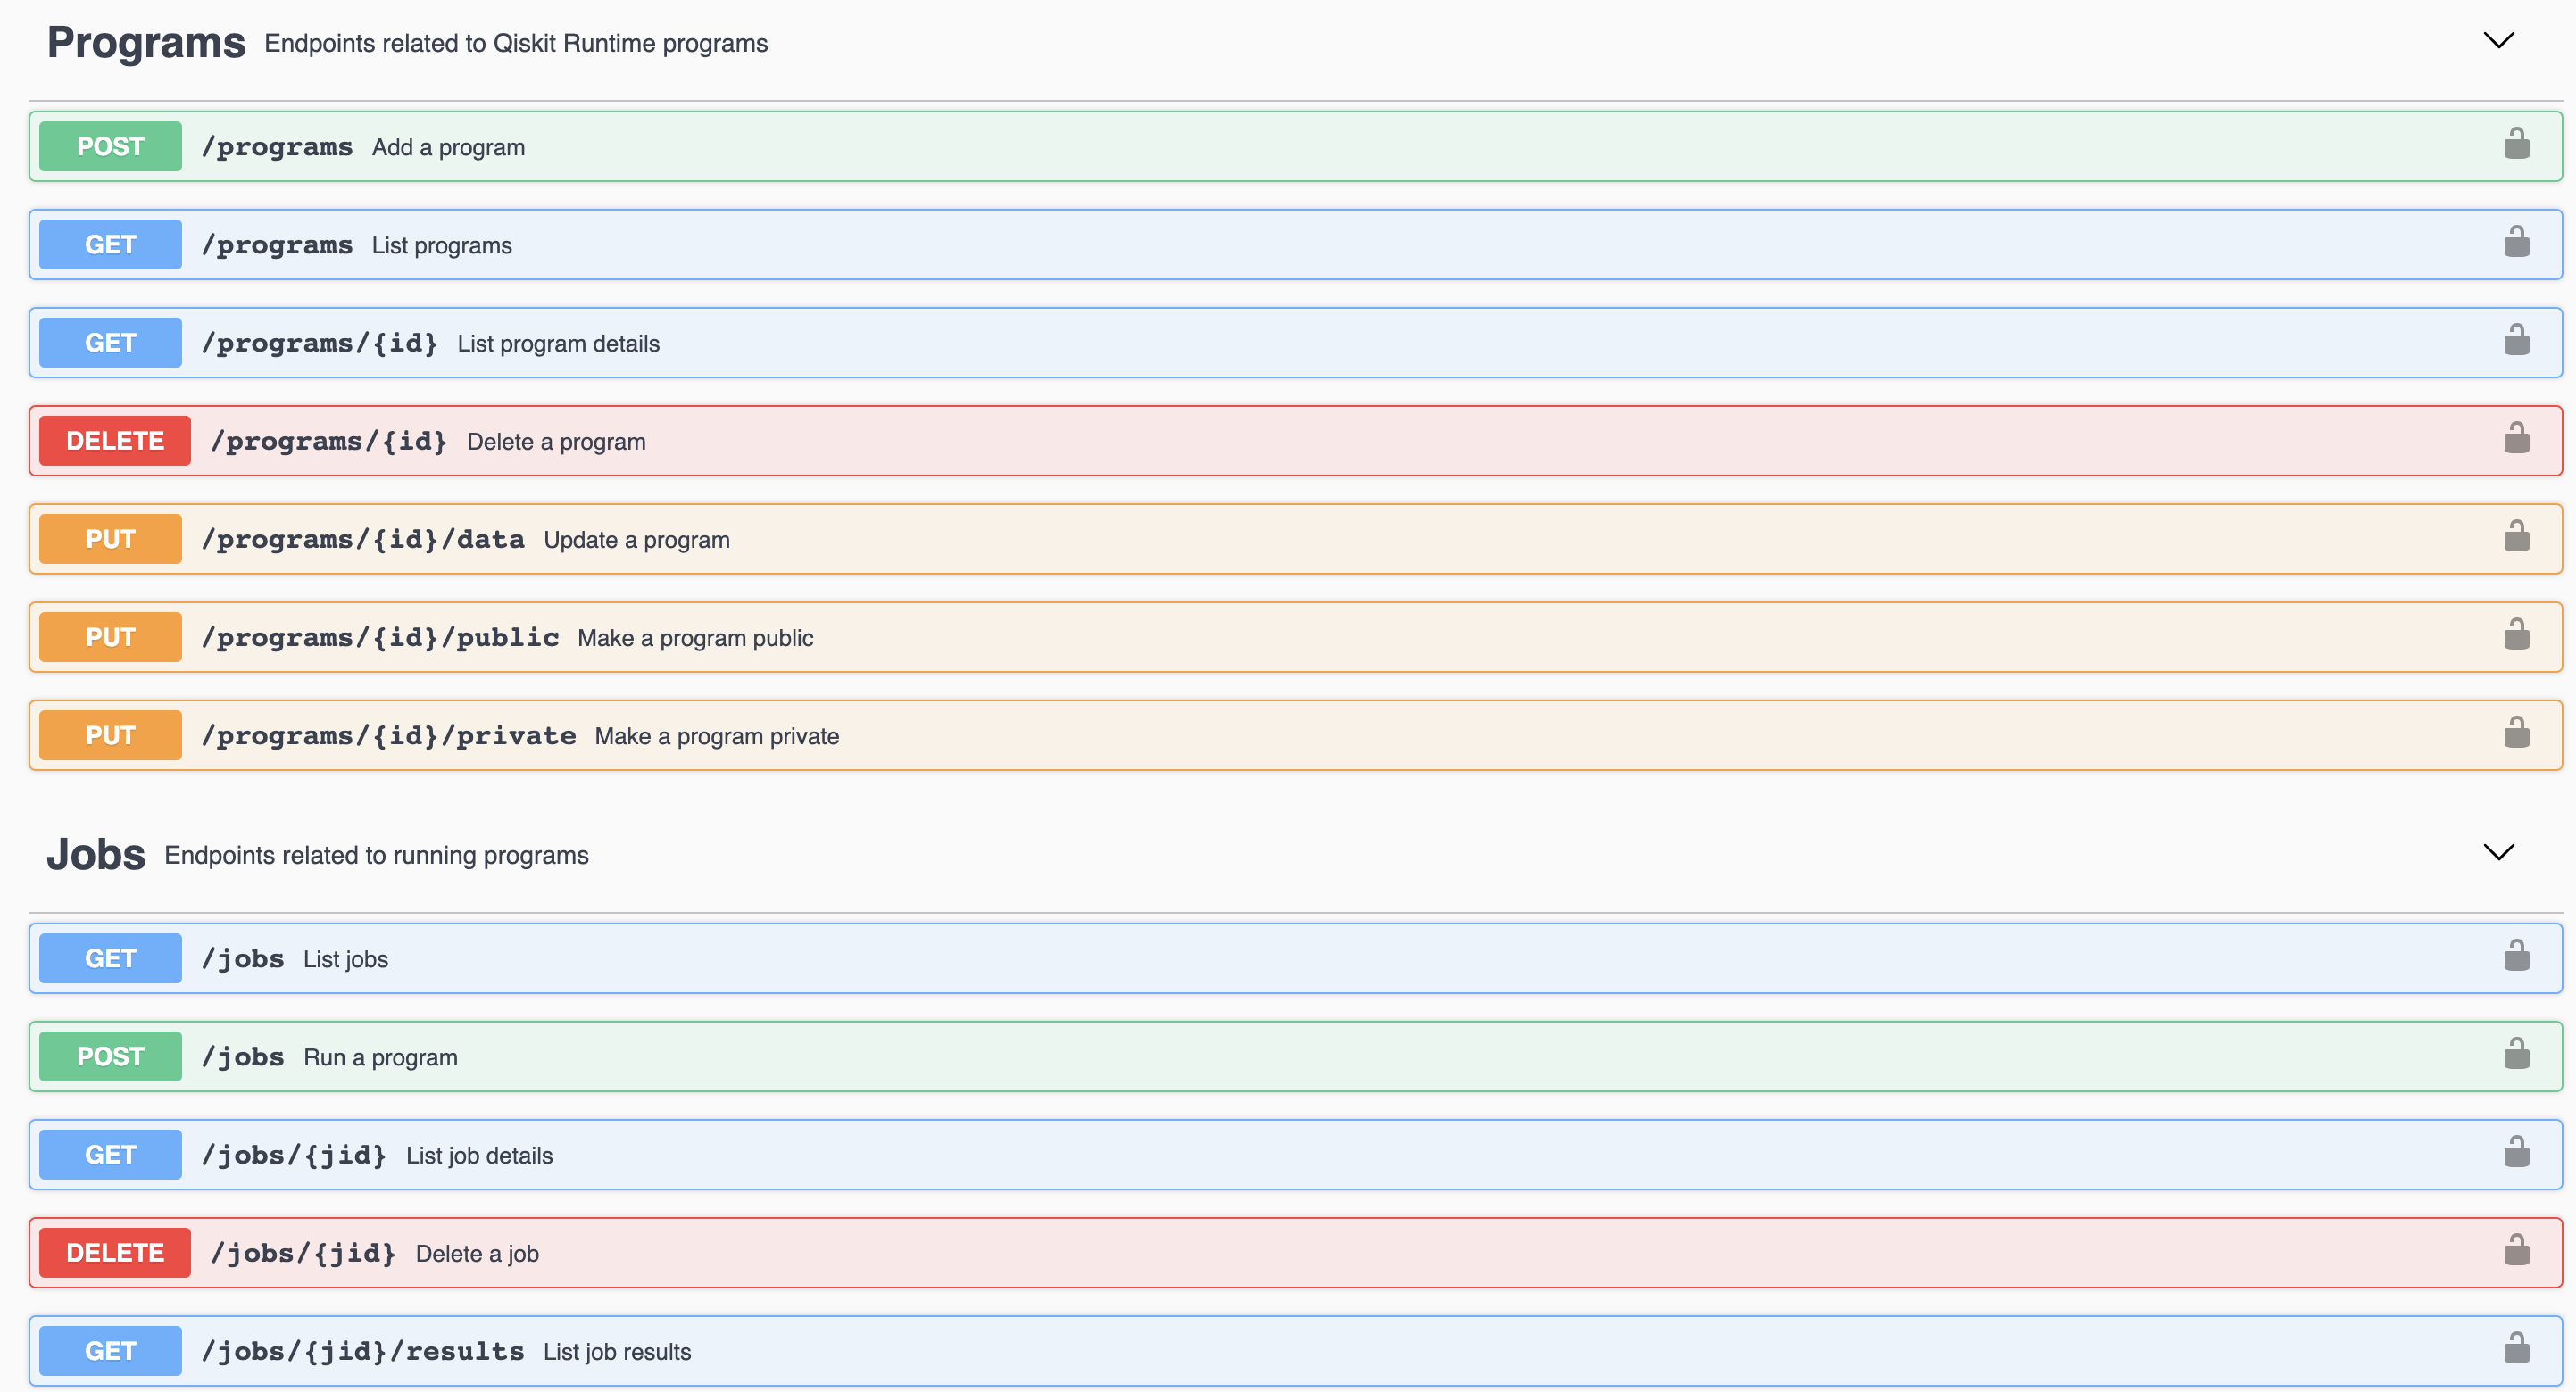

Here we will use the Python `requests` package to invoke Qiskit Runtime directly, without Qiskit.

### Authenticating with the Service

In [42]:
# You'll need to pass your API token in the header of every call

import os
import requests
import json

api_token = os.environ.get("QE_TOKEN")

headers = {
  'Authorization': f'Bearer {api_token}',
  'Content-Type': 'application/json'
}

RUNTIME_API_URL = "https://runtime-us-east.quantum-computing.ibm.com/"

### Listing Programs

In [43]:
response = requests.get(RUNTIME_API_URL + 'programs' , headers=headers)

if response.status_code != 200:
    raise ValueError(f"Unexpected status code: {response.status_code}")

list_of_programs = response.json()    
print(f'Qiskit Runtime Programs:')

for program in list_of_programs:
    print(f'- {program["name"]}: {program["description"]} ')

Qiskit Runtime Programs:
- estimator: Expectation value estimator. A runtime program that estimates the value of an observable for an input quantum circuit. This program is in beta mode and is only available to select accounts. 
- circuit-runner-qasm3: A runtime program that takes one or more circuits, converts them to QASM3, compiles them, executes them, and optionally applies measurement error mitigation. This program can also take and execute one or more QASM3 strings. Note that this program can only run on a backend that supports QASM3. 
- sample-expval: A sample expectation value program. 
- vqe: Variational Quantum Eigensolver (VQE) to find the minimal eigenvalue of a Hamiltonian. 
- circuit-runner: A runtime program that takes one or more circuits, compiles them, executes them, and optionally applies measurement error mitigation. 
- hello-world: A sample runtime program. 
- quantum-kernel-alignment: Quantum kernel alignment algorithm that learns, on a given dataset, a quantum ke

### Running hello-world

In [44]:
# Prepare program input
runtime_inputs = {"iterations": 2}

# Prepare request parameters
params = json.dumps({
  "programId": "hello-world",
  "hub": "ibm-q",
  "group": "open",
  "project": "main",
  "backend": "ibmq_qasm_simulator",
  "params": [
    json.dumps(runtime_inputs)
  ]
})

# Send the request
response = requests.post(RUNTIME_API_URL + 'jobs', data=params, headers=headers)

if response.status_code != 200:
    raise ValueError(f"Unexpected status code: {response.status_code}")

job_id =  response.json()['id']
print(f"Job: {job_id}")

Job: c5mundt7js99mk9mi74g


In [45]:
# You are going to get a 204 status code while the Qiskit program is still running.

import time

while True:
    response = requests.get(RUNTIME_API_URL + 'jobs/'+ job_id +'/results', headers=headers)

    if response.status_code == 200:
        print(f'Final Result: {response.text}')
        break
        
    elif response.status_code == 204:
        print(f'Waiting for the final result')
        time.sleep(3)
        
    else:
        print(f'Error:{response.status_code}')
        break

Waiting for the final result
Waiting for the final result
Waiting for the final result
Final Result: All done!


## Outlook

Not set in stone!

- Using Qiskit Runtime through IBM Cloud
- Calling a runtime program from another runtime program
- Stateful execution

## Recap

In [ ]:
from qiskit import IBMQ

provider = IBMQ.load_account()

# Uploading a program - a program must have a main(backend, user_messenger, **kwargs) method
program_id = provider.runtime.upload_program(
    data=my_program.py,
    metadata=my_program.json
)

# Running a program
program_inputs = {'iterations': 2}
options = {'backend_name': "ibmq_qasm_simulator"}
job = provider.runtime.run(program_id="hello-world",
                           options=options,
                           inputs=program_inputs,
                          )
print(f"\nFinal result: {job.result()}")

## Exercise: Uploading and Running Your Program

Qiskit Runtime samples and tutorials: https://github.com/Qiskit-Partners/qiskit-runtime